In [1]:
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

import matplotlib.pyplot as plt
import seaborn.objects as so
import seaborn as sns
import numpy as np

### Testing Tensorflow for GPU

In [2]:
print(f"Numbers of GPU: { len( tf.config.list_physical_devices('GPU'))}")

Numbers of GPU: 2


### Reading the Data

In [3]:
w_dir = pathlib.Path('/home/antirrabia/Documents/DeepLearnin/DATASETS/CatsVsDogs/cats_vs_dogs_small/')

In [4]:
tr_d = image_dataset_from_directory(
    w_dir / 'train',
    image_size=(180,180),
    batch_size=32
)

va_d = image_dataset_from_directory(
    w_dir / 'validation',
    image_size=(180,180),
    batch_size=32
)

te_d = image_dataset_from_directory(
    w_dir / 'test',
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


2023-04-08 13:04:20.201590: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2973 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 980, pci bus id: 0000:02:00.0, compute capability: 5.2
2023-04-08 13:04:20.204867: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 3284 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 980, pci bus id: 0000:03:00.0, compute capability: 5.2


### Importing VGG16

In [5]:
conv_base = keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet'
)

conv_base.trainable = False

### Augmentation

In [7]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

### The Model

In [9]:
inputs = keras.Input(shape=(180,180,3))

x = data_augmentation(inputs)

# Feature estraction
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)

# our Classifier
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Training

In [10]:
callbacks = [ 
    keras.callbacks.ModelCheckpoint(
        filepath='CatsVsDogs-Fine-tuning-FeatureStraction-VGG16.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

history = model.fit(
    tr_d,
    epochs=52,
    validation_data=va_d,
    callbacks=callbacks
)

Epoch 1/52


2023-04-08 13:24:49.111767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2000]
	 [[{{node Placeholder/_4}}]]
2023-04-08 13:24:49.112607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2000]
	 [[{{node Placeholder/_4}}]]
2023-04-08 13:24:51.252266: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-08 13:24:53.118073: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.24GiB with freed_by_count=0. The caller indicates that thi

62/63 [============================>.] - ETA: 0s - loss: 12.4175 - accuracy: 0.8992

2023-04-08 13:25:03.907570: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


63/63 [==============================] - ETA: 0s - loss: 12.3181 - accuracy: 0.9000

2023-04-08 13:25:05.451283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1000]
	 [[{{node Placeholder/_4}}]]
2023-04-08 13:25:05.452050: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1000]
	 [[{{node Placeholder/_0}}]]


63/63 [==============================] - 21s 220ms/step - loss: 12.3181 - accuracy: 0.9000 - val_loss: 3.1639 - val_accuracy: 0.9700
Epoch 2/52
63/63 [==============================] - 10s 165ms/step - loss: 8.7575 - accuracy: 0.9410 - val_loss: 3.2478 - val_accuracy: 0.9710
Epoch 3/52
63/63 [==============================] - 10s 166ms/step - loss: 4.9298 - accuracy: 0.9625 - val_loss: 3.8090 - val_accuracy: 0.9760
Epoch 4/52
63/63 [==============================] - 10s 165ms/step - loss: 5.5607 - accuracy: 0.9610 - val_loss: 4.9273 - val_accuracy: 0.9680
Epoch 5/52
63/63 [==============================] - 10s 165ms/step - loss: 4.6009 - accuracy: 0.9645 - val_loss: 4.0680 - val_accuracy: 0.9710
Epoch 6/52
63/63 [==============================] - 10s 165ms/step - loss: 3.7914 - accuracy: 0.9675 - val_loss: 7.4969 - val_accuracy: 0.9660
Epoch 7/52
63/63 [==============================] - 10s 166ms/step - loss: 3.4559 - accuracy: 0.9710 - val_loss: 6.7257 - val_accuracy: 0.9670
Epoch 8/5

### Printing the training

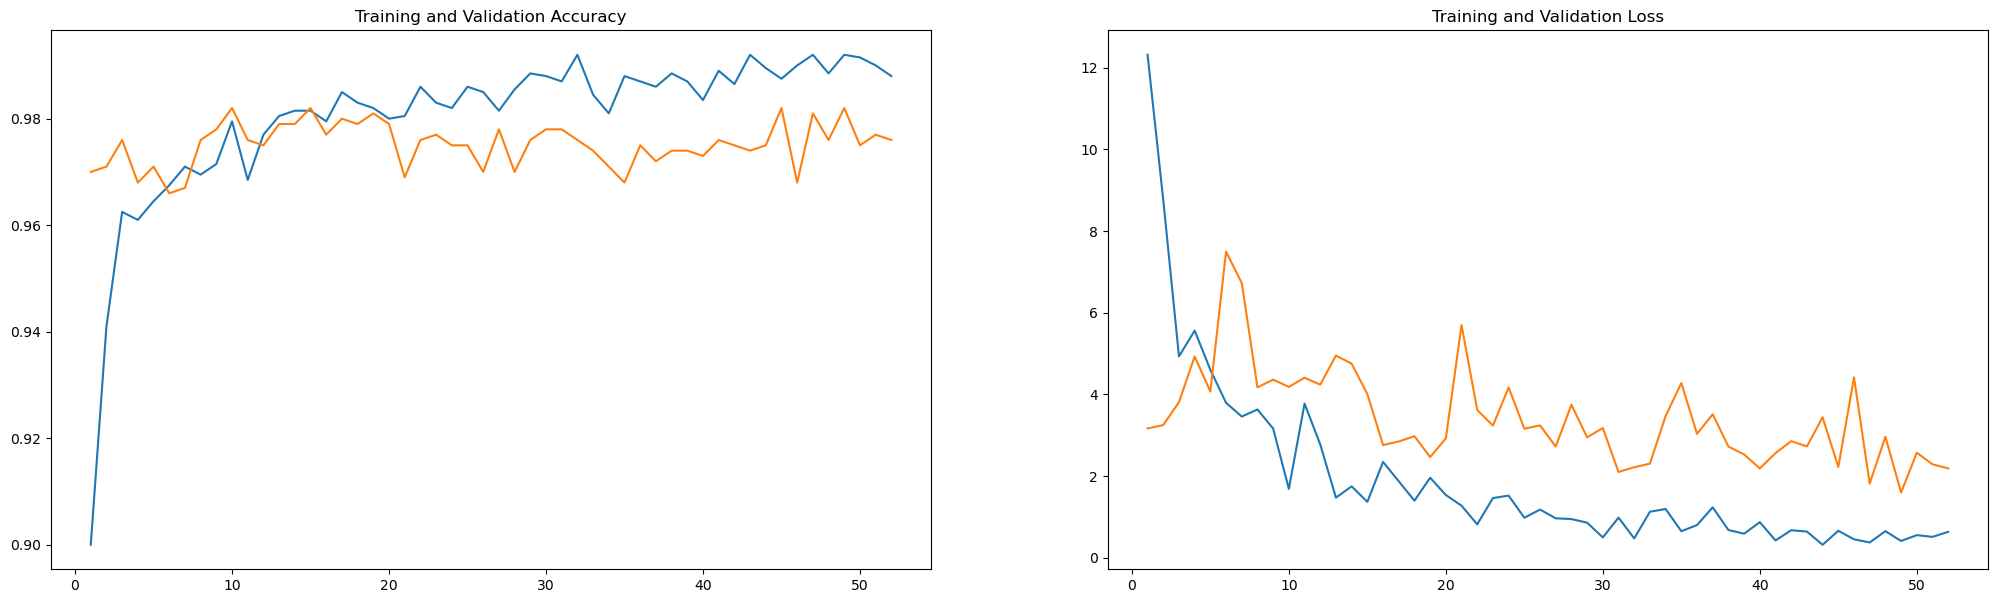

In [11]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len( accuracy) + 1)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(25,7))

ax[0].plot(epochs, accuracy, label='Training Accuracy')
ax[0].plot(epochs, val_acc, label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')

ax[1].plot(epochs, loss, label='Training Loss')
ax[1].plot(epochs, val_loss, label='Validation Loss')
ax[1].set_title('Training and Validation Loss');

In [12]:
te_model = keras.models.load_model('CatsVsDogs-Fine-tuning-VGG16.keras')

te_loss, te_acc = te_model.evaluate(te_d)

print(f"Test accuracy: {te_acc:.3f}")

2023-04-08 13:46:34.536811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2000]
	 [[{{node Placeholder/_0}}]]
2023-04-08 13:46:34.537170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2000]
	 [[{{node Placeholder/_4}}]]


63/63 [==============================] - 7s 105ms/step - loss: 2.7196 - accuracy: 0.9755
Test accuracy: 0.975


### Fine-tuning State

In [13]:
conv_base.trainable = True

for layer in conv_base.layers[:-4]:
    layer.trainable = False

### New Compile

In [17]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### New Training including the tops 3 conv2d from VGG16

In [18]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='CatsVsDogs-Fine-tuning-VGG16.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

ft_history = model.fit(
    tr_d,
    epochs=25,
    validation_data=va_d,
    callbacks=callbacks
)

Epoch 1/25
63/63 [==============================] - 15s 191ms/step - loss: 0.6031 - accuracy: 0.9900 - val_loss: 1.5998 - val_accuracy: 0.9800
Epoch 2/25
63/63 [==============================] - 11s 180ms/step - loss: 0.6158 - accuracy: 0.9855 - val_loss: 1.7851 - val_accuracy: 0.9760
Epoch 3/25
63/63 [==============================] - 11s 181ms/step - loss: 0.3632 - accuracy: 0.9910 - val_loss: 2.4445 - val_accuracy: 0.9790
Epoch 4/25
63/63 [==============================] - 11s 181ms/step - loss: 0.4304 - accuracy: 0.9890 - val_loss: 1.8369 - val_accuracy: 0.9760
Epoch 5/25
63/63 [==============================] - 11s 182ms/step - loss: 0.3062 - accuracy: 0.9930 - val_loss: 2.0669 - val_accuracy: 0.9740
Epoch 6/25
63/63 [==============================] - 11s 182ms/step - loss: 0.3761 - accuracy: 0.9920 - val_loss: 2.0312 - val_accuracy: 0.9770
Epoch 7/25
63/63 [==============================] - 12s 183ms/step - loss: 0.1930 - accuracy: 0.9945 - val_loss: 2.0531 - val_accuracy: 0.9780

### Printing the new training with fine-tuning

In [20]:
ft_accuracy = ft_history.history['accuracy']
ft_val_acc = ft_history.history['val_accuracy']

ft_loss = ft_history.history['loss']
ft_val_loss = ft_history.history['val_loss']

ft_epochs = range(1, len(ft_accuracy)+1)

Text(0.5, 1.0, 'Training and Validation Loss')

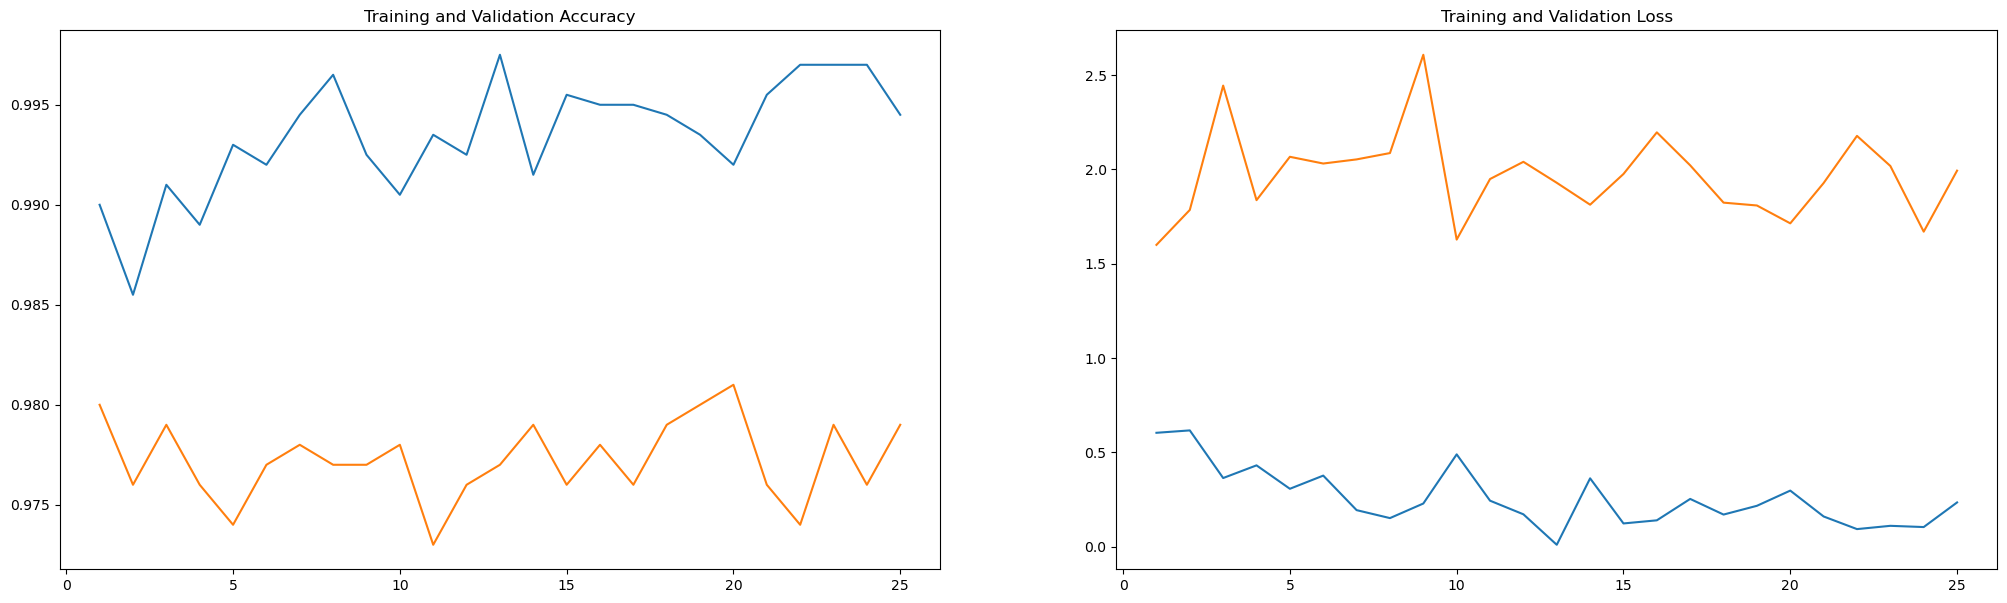

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,7))

ax[0].plot(ft_epochs, ft_accuracy, label='Training Accuracy')
ax[0].plot(ft_epochs, ft_val_acc, label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')

ax[1].plot(ft_epochs, ft_loss, label='Training Loss')
ax[1].plot(ft_epochs, ft_val_loss, label='Validation Loss')
ax[1].set_title('Training and Validation Loss')

### Evaluating the Fine-tuning

In [23]:
ft_te_model = keras.models.load_model('CatsVsDogs-Fine-tuning-VGG16.keras')

ft_te_loss, ft_te_acc = ft_te_model.evaluate(te_d)

print(f"Fine-tunin test accuracy: {ft_te_acc:.3f}")

63/63 [==============================] - 7s 105ms/step - loss: 2.0590 - accuracy: 0.9785
Fine-tunin test accuracy: 0.979
